In [5]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
def cut_cat_b(df, b_cut = 20):
    sc = SkyCoord(ra=np.array(df['RA'])*u.degree, dec=np.array(df['DEC'])*u.degree, frame='icrs')
    b = sc.galactic.b.degree
    df = df[np.abs(b) > b_cut]
    df.index = np.arange(len(df))
    return df

In [3]:
def get_true_cats(files):
    return {os.path.splitext(os.path.basename(file))[0] : pd.read_csv(file) for file in files}

In [4]:
def get_name(file):
    if 'pz_act' in file:
        return file[5:13]
    return file[5:9]

def get_det_cats(files):
    return {get_name(os.path.splitext(os.path.basename(file))[0]) : 
                pd.read_csv(file) for file in files}

In [26]:
def draw_m500_z(det_file, true_files, b_cut=20):
    true_cats = get_true_cats(true_files)
    det_cat = pd.read_csv(det_file)
    
    det_cat = det_cat[det_cat['status'] != 'fn']
    det_cat.index = np.arange(len(det_cat))
    det_cat = cut_cat_b(det_cat)
    for name in true_cats:
        true_cats[name] = cut_cat_b(true_cats[name], b_cut)
    
    
    det_sc = SkyCoord(ra=np.array(det_cat['RA'])*u.degree, 
                      dec=np.array(det_cat['DEC'])*u.degree, frame='icrs')
    for name in true_cats:
        tsc = SkyCoord(ra=np.array(true_cats[name]['RA'])*u.degree, 
                       dec=np.array(true_cats[name]['DEC'])*u.degree, 
                                                frame='icrs')
        idx, d2d, _ = det_sc.match_to_catalog_sky(tsc)
        matched = d2d.degree < (5 / 60)
        true_cats[name]['matched'] = False
        true_cats[name]['matched'].iloc[idx[matched]] = True

    _, ax = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
    coords = {'PSZ2' : [0.8, 4], 'MCXC' : [1, 5], 'ACT' : [1.5, 4]}
    for i, cat in enumerate(true_cats):
        true_cats[cat] = true_cats[cat][true_cats[cat] != -1]
        matched = true_cats[cat]
        matched = matched[matched['matched']]
        s = ax[0][i].scatter(matched['z'], matched['M500'], alpha=0.3, c='r')
        s.set_label('matched')
        unmatched = true_cats[cat]
        unmatched = unmatched[unmatched['matched'] == False]
        s = ax[1][i].scatter(unmatched['z'], unmatched['M500'], alpha=0.1, c='b')
        s.set_label('unmatched')
        for j in range(2):
            ax[j][i].set_ylabel('M500')
            ax[j][i].grid()
            ax[j][i].legend()
        ax[1][i].set_xlabel(cat)

In [23]:
tr_dir = '/home/rt2122/Data/original_catalogs/csv/'
tr_files = np.array(next(os.walk(tr_dir))[-1])
tr_files = tr_files[tr_files != 'RM.csv']
tr_files = [os.path.join(tr_dir, name) for name in tr_files]

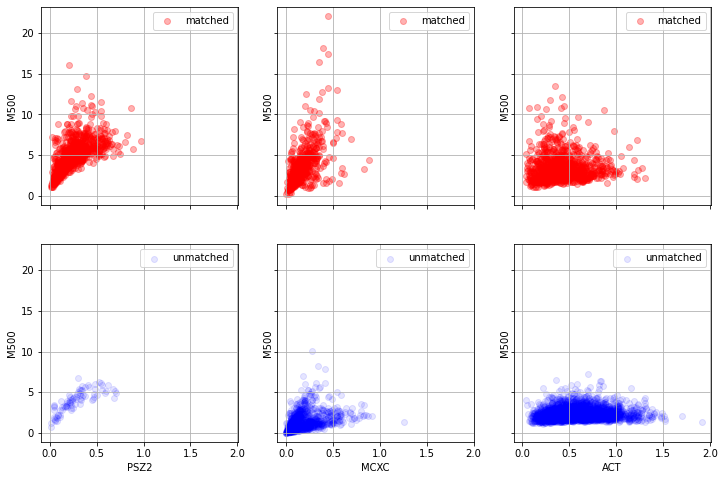

In [27]:
draw_m500_z('/home/rt2122/Data/detected_cats/full_pz_act10_thr0.1_step8.csv', tr_files, b_cut=20)

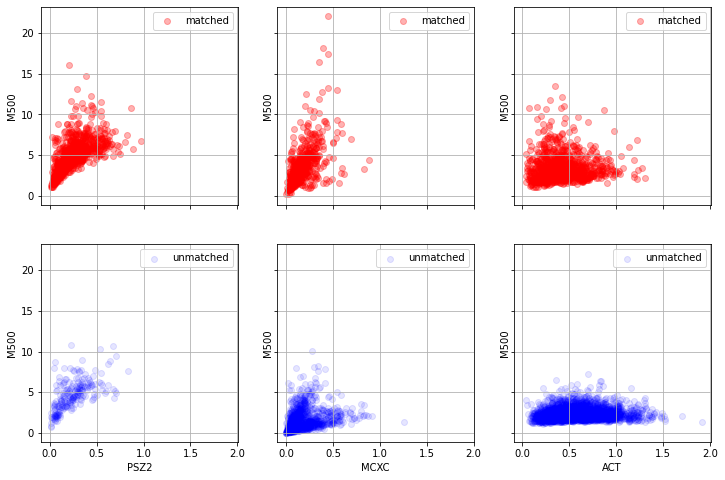

In [28]:
draw_m500_z('/home/rt2122/Data/detected_cats/full_pz_act10_thr0.1_step8.csv', tr_files, b_cut=0)

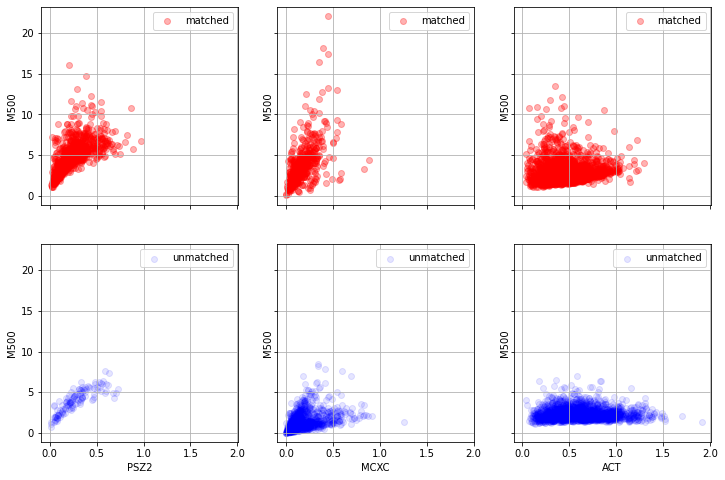

In [29]:
draw_m500_z('/home/rt2122/Data/detected_cats/full_pz_act20_thr0.1_step8.csv', tr_files, b_cut=20)

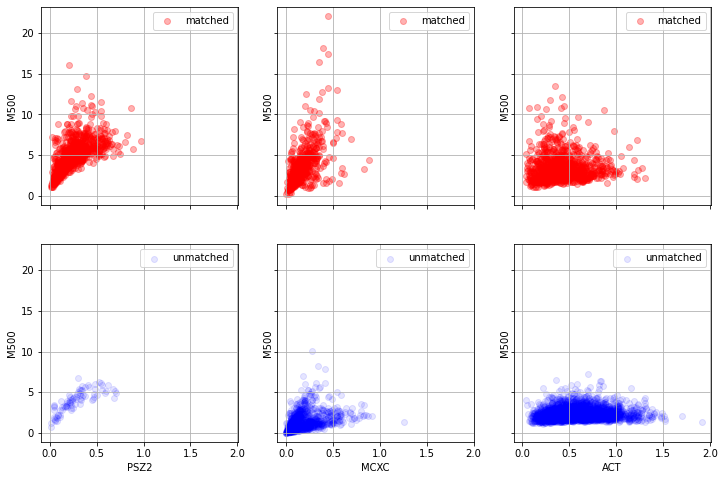

In [30]:
draw_m500_z('/home/rt2122/Data/detected_cats/full_pz_act10_thr0.1_step8.csv', tr_files, b_cut=20)